In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
from pathlib import Path
sys.path.append(Path.cwd().parent.as_posix()+'/BlackBoxAI')

from api.data import Data
from api.learner import Learner
from api.runner import Runner
from callback.callback import *
from callback.recorder import Recorder
from callback.avgStats import AvgStatsCallback
from callback.paramScheduler import ParamScheduler
from callback.lrFind import LR_Find
from helper.annealer import *
from helper.helper import *

In [3]:
def get_model(data, lr=0.5, nh=50):
    m = data.train_ds.x.shape[1]
    model = nn.Sequential(nn.Linear(m,nh), nn.ReLU(), nn.Linear(nh,data.c))
    return model, optim.SGD(model.parameters(), lr=lr)
def get_model_func(lr=0.5): return partial(get_model, lr=lr)

In [4]:
sched = combine_scheds([0.3, 0.7], [sched_cos(0.3, 0.6), sched_cos(0.6, 0.2)])

In [5]:
Data.avaliable_urls()

MNIST_URL http://deeplearning.net/data/mnist/mnist.pkl


In [6]:
train_ds, valid_ds, c = Data.load_data()

In [7]:
bs = 512
data = Data.to_bunch(train_ds, valid_ds, bs, c)

In [8]:
loss_func = F.cross_entropy

In [9]:
learn = create_learner(get_model_func(), loss_func, data)

In [10]:
cbfs = [Recorder,
        partial(AvgStatsCallback,accuracy),
        partial(ParamScheduler, 'lr', sched)]

In [11]:
run = Runner(cb_funcs=cbfs)
run.fit(3, learn)

train: [0.5499390234375, tensor(0.8285)]
valid: [0.20043265380859376, tensor(0.9406)]
train: [0.188917265625, tensor(0.9434)]
valid: [0.13799326171875, tensor(0.9579)]
train: [0.128751748046875, tensor(0.9621)]
valid: [0.121801025390625, tensor(0.9643)]


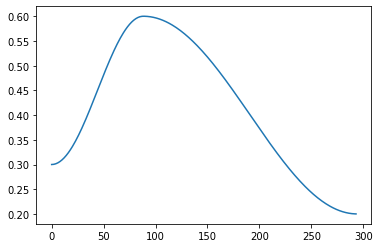

In [12]:
run.recorder.plot_lr()

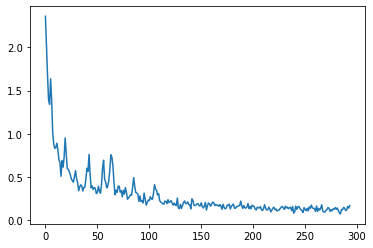

In [13]:
run.recorder.plot_loss()

In [14]:
### LR Finder
learn = create_learner(get_model, loss_func, data)
run = Runner(cb_funcs=[LR_Find, Recorder])
run.fit(2, learn)

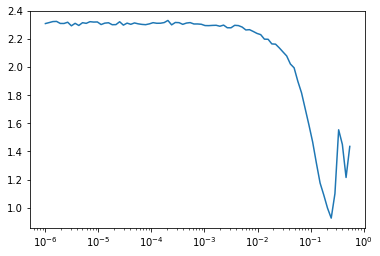

In [15]:
run.recorder.plot(skip_last=5)

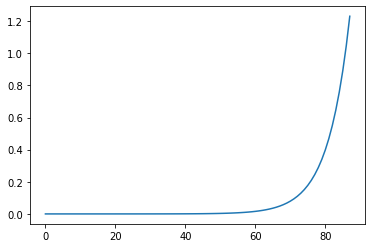

In [16]:
run.recorder.plot_lr()